In [11]:
#pip install seaborn

In [12]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Collors
sns.set_palette("muted")  # Alternativamente: "muted", "dark", "pastel"
colors = sns.color_palette(n_colors=100)

In [14]:
def load_csvs(directory):
    data = {}
    counters = {}
    # Traverse the directory and its subdirectories
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv") and not "checkpoint" in file and not "combined" in file:  # Check if it's a CSV file
                full_path = os.path.join(root, file)
                #print(full_path)
                #relative_path = os.path.relpath(full_path, directory)  # Relative path
                base_name = os.path.splitext(file)[0]
                
                # If there are files with the same name, add a counter
                if base_name in counters:
                    counters[base_name] += 1
                else:
                    counters[base_name] = 1

                counter = full_path.split("@")[1].split( "/")[0]
                    
                data_name = f"{base_name}_{counter}"
                
                try:
                    data[data_name] = pd.read_csv(full_path)
                    print(f"\tLoaded name   : {data_name}")
                    print(f"\tLoaded path   : {full_path}")
                    print("")
                    
                except Exception as e:
                    print(f"Error loading {data_name}: {e}")
                
    return data

In [15]:
# data_depois = load_csvs("./docs/samples/article/")
data_depois = load_csvs("./experiments/")

	Loaded name   : global.statistics_2
	Loaded path   : ./experiments/globalStatistics/2025-05-20-22-13-31@2/global.statistics.csv

	Loaded name   : global.statistics_1
	Loaded path   : ./experiments/globalStatistics/2025-05-20-22-13-31@1/global.statistics.csv

	Loaded name   : global.statistics_3
	Loaded path   : ./experiments/globalStatistics/2025-05-20-22-13-31@3/global.statistics.csv

	Loaded name   : autodroid_watcher_local_client-autodroid-worker1_1
	Loaded path   : ./experiments/2025-05-20-22-07-38@1/autodroid_watcher_local_client-autodroid-worker1.csv

	Loaded name   : statistics_1
	Loaded path   : ./experiments/2025-05-20-22-07-38@1/statistics.csv

	Loaded name   : autodroid_watcher_local_client-autodroid-worker2_1
	Loaded path   : ./experiments/2025-05-20-22-07-38@1/autodroid_watcher_local_client-autodroid-worker2.csv

	Loaded name   : autodroid_watcher_local_client-autodroid-worker3_1
	Loaded path   : ./experiments/2025-05-20-22-07-38@1/autodroid_watcher_local_client-autodroid

In [16]:
def plot_statistics(dfs, selected_dfs, field="ActiveProcessingCount_mean", ylabel="Qtd de Tarefas (média por máquina)", label_sufix="", save_path="tasks.pdf", 
                    xlim=1074,  
                    field_std="ActiveProcessingCount_std_dev"):
    """
    Plots processing statistics over time for multiple datasets.

    Parameters:
    - dfs (dict): Dictionary containing DataFrames with the data to be plotted.
    - selected_dfs (list): List of keys (file names) from the `dfs` dictionary to be plotted.
    - field (str, optional): Column name to be plotted on the y-axis (default: "ActiveProcessingCount_mean").
    - ylabel (str, optional): Label for the y-axis (default: "Quantidade de Processos (média por máquina)").
    - label_sufix (str, optional): Suffix to be added to the legend labels (default: "").

    Returns:
    - None (displays the generated plot).
    """

    plt.figure(figsize=(4, 3))  # Set the figure size
    
    # Iterate over the selected datasets and assign colors
    for file, color in zip(selected_dfs, colors):
        df = dfs[file]
        label = file.replace("global.statistics_", "")
        label = label.replace("statistics-group1_", "")
        label = label.replace("statistics-group2_","")
        label = label.replace("w4_","")
        label = label.replace("w5_","") # Remove prefix for a cleaner label
        label = label.replace("global.","")
        label = f"{label}{label_sufix}"  # Append suffix if provided
        
        plt.plot(df["Count"], df[field], label=label, color=color)  # Plot the data
        if field_std is not None:
            plt.fill_between(df["Count"], df[field] - df[field_std], df[field] + df[field_std], 
                     color=color, alpha=0.2) 

    plt.xlabel("Tempo (s)")  # Label for the x-axis
    plt.ylabel(ylabel)  # Label for the y-axis
    plt.ylim(0, 3.05)  # Set y-axis limits
    plt.xlim(0, xlim)  # Set x-axis limits
    plt.legend()  # Display the legend
    plt.grid()  # Enable grid lines
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    print(f"Plot saved as: {save_path}")
    plt.show()  # Show the plot

In [17]:
files = sorted([f for f in data_depois.keys() if re.match("global.statistics*", f)  and "group" not in f ], reverse=True)
print(files)

['global.statistics_3', 'global.statistics_2', 'global.statistics_1']


Plot saved as: tasks_un.pdf


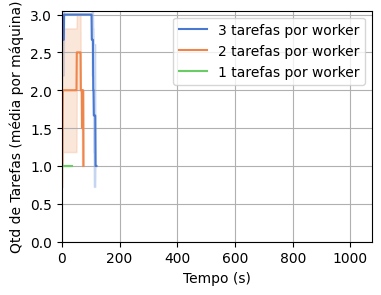

In [23]:
plot_statistics(data_depois, files, label_sufix=" tarefas por worker", save_path="tasks_un.pdf" )

In [27]:
def plot_resources_tasks(dfs, selected_dfs, field="ActiveProcessingCount_mean", ylabel="Qtd de Tarefas (média por máquina)", label_sufix="", save_path="tasks.pdf", 
                    xlim=1074,  
                    field_std="ActiveProcessingCount_std_dev"):
    """
    Plots processing statistics over time for multiple datasets.

    Parameters:
    - dfs (dict): Dictionary containing DataFrames with the data to be plotted.
    - selected_dfs (list): List of keys (file names) from the `dfs` dictionary to be plotted.
    - field (str, optional): Column name to be plotted on the y-axis (default: "ActiveProcessingCount_mean").
    - ylabel (str, optional): Label for the y-axis (default: "Quantidade de Processos (média por máquina)").
    - label_sufix (str, optional): Suffix to be added to the legend labels (default: "").

    Returns:
    - None (displays the generated plot).
    """
    # Criar gráfico
    plt.figure(figsize=(4, 3))
    

    groups = {}
    # ['global.statistics_3', 'global.statistics_2', 'global.statistics_1']
    groups['G1'] = sorted([f for f in data_depois.keys() if re.match("global.statistics_*", f)], reverse=True)
    #groups['G2'] = sorted([f for f in data_depois.keys() if re.match("global.statistics-group1_*", f)], reverse=True)
    #groups['G3'] = sorted([f for f in data_depois.keys() if re.match("w4_*", f)], reverse=True)
    #groups['G4'] = sorted([f for f in data_depois.keys() if re.match("w5_*", f)], reverse=True)

    for i in range(2):
        for g, color in zip(groups.keys(), colors):
            df_combined = pd.DataFrame()
            selected_dfs = groups[g]
            # Iterate over the selected datasets and assign colors
            for file  in  selected_dfs:
                df = dfs[file]
                df_combined = pd.concat([df_combined, df], ignore_index=True)  # Adiciona os dados ao DataFrame combinado
    
            
            field_process = "ActiveProcessingCount_mean"
            field_mean = "Host_Memory_Used_mean"
            field_std = "Host_Memory_Used_mean"
            
            if g == "G3" or g == "G4":
                field_process = "ActiveProcessingCount"
                field_mean = "Host_Memory_Used"
                field_std = "Host_Memory_Used" 
                
            # Filtrar apenas os valores inteiros de ActiveProcessingCount_mean
            df_filtered = df_combined[df_combined[field_process] % 1 == 0]    
            grouped = df_filtered.groupby(field_process)[field_mean]
        
            # Calcular média e desvio padrão por grupo
            mean_values = grouped.mean()
            std_values = df_filtered.groupby(field_process)[field_std].std()
            mean_values_gb = mean_values / 1e9
            std_values_gb = std_values / 1e9

            if i == 0:
                # plt.plot(mean_values.index, mean_values, label=g, color=color)
                plt.scatter(mean_values.index, mean_values_gb, label=g, color=color)
                plt.errorbar(mean_values.index, mean_values_gb, yerr=std_values_gb, fmt='o', color=color, capsize=5)
            
            # Ajuste linear (ax + b)
            coeffs = np.polyfit(mean_values_gb.index, mean_values_gb, 1)  # Grau 1 → reta
            a, b = coeffs  # Extrai coeficientes
            
            # Criar curva de ajuste
            x_fit = np.linspace(min(mean_values_gb.index), max(mean_values_gb.index), 100)
            y_fit = a * x_fit + b

            if i == 1:
                # Adicionar a curva ao gráfico
                plt.plot(x_fit, y_fit, linestyle="--", color=color, label=f"f(x) = {a:.2f}x + {b:.2f}")

        # plt.fill_between(mean_values.index, mean_values - std_dev_values, mean_values + std_dev_values, 
        #                  color=color, alpha=0.2)
    
    # Configurações do gráfico
    plt.xticks([0, 1, 2, 3])
    plt.xlabel("Tarefas Simultâneas em execução")
    plt.ylabel("Uso Médio de Memória (GB)")
    #plt.title("Uso de Memória do Host vs. ActiveProcessingCount")
    # plt.legend()
    plt.legend(ncol=2)
    plt.grid()
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    plt.show()


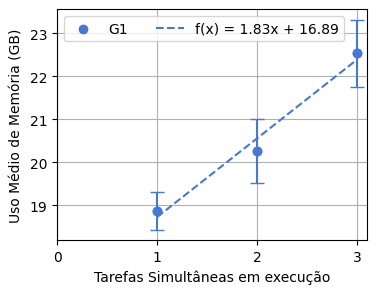

In [28]:
plot_resources_tasks(data_depois, files, field="Host_Memory_Used_mean", ylabel="Uso de Memória (MB)", save_path="mem_tasks.pdf")

['global.statistics_3', 'global.statistics_2', 'global.statistics_1']
Plot saved as: tasks_un_g1.pdf


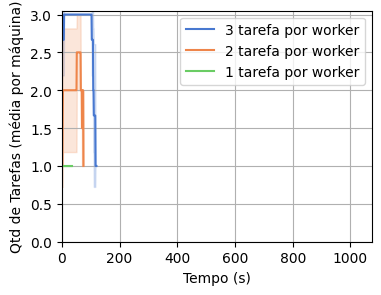

In [30]:
files2 = sorted([f for f in data_depois.keys() if re.match("global.statistics*", f)], reverse=True)
print(files2)
plot_statistics(data_depois, files2, label_sufix=" tarefa por worker", save_path="tasks_un_g1.pdf" )

Plot saved as: tasks_un_g2.pdf


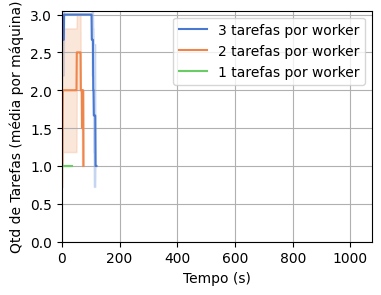

In [33]:
files3 = sorted([f for f in data_depois.keys() if re.match("global.statistics*", f)], reverse=True)
plot_statistics(data_depois, files3, label_sufix=" tarefas por worker", save_path="tasks_un_g2.pdf" )

dict_keys(['global.statistics_2', 'global.statistics_1', 'global.statistics_3', 'autodroid_watcher_local_client-autodroid-worker1_1', 'statistics_1', 'autodroid_watcher_local_client-autodroid-worker2_1', 'autodroid_watcher_local_client-autodroid-worker3_1', 'autodroid_watcher_local_client-autodroid-worker1_3', 'statistics_3', 'autodroid_watcher_local_client-autodroid-worker2_3', 'autodroid_watcher_local_client-autodroid-worker3_3', 'autodroid_watcher_local_client-autodroid-worker1_2', 'statistics_2', 'autodroid_watcher_local_client-autodroid-worker2_2', 'autodroid_watcher_local_client-autodroid-worker3_2'])
Plot saved as: tasks_un_g3.pdf


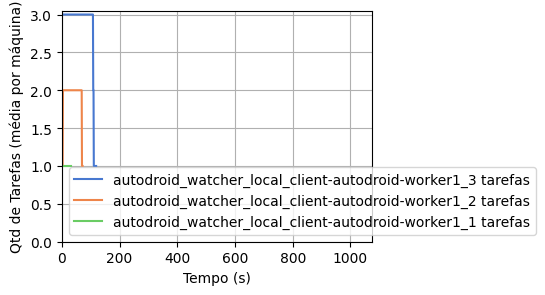

In [42]:
files4 = sorted([f for f in data_depois.keys() if re.match("autodroid_watcher_local_client-autodroid-worker1_*", f)], reverse=True)
print(data_depois.keys())
plot_statistics(data_depois, files4, field= "ActiveProcessingCount", label_sufix=" tarefas", save_path="tasks_un_g3.pdf",   field_std=None )

Plot saved as: tasks_un_g4.pdf


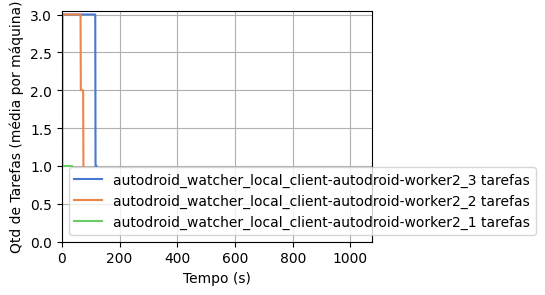

In [43]:
files5 = sorted([f for f in data_depois.keys() if re.match("autodroid_watcher_local_client-autodroid-worker2_*", f)], reverse=True)
plot_statistics(data_depois, files5, field= "ActiveProcessingCount", label_sufix=" tarefas", save_path="tasks_un_g4.pdf",  field_std=None )

Plot saved as: tasks_un_g4_zoom.pdf


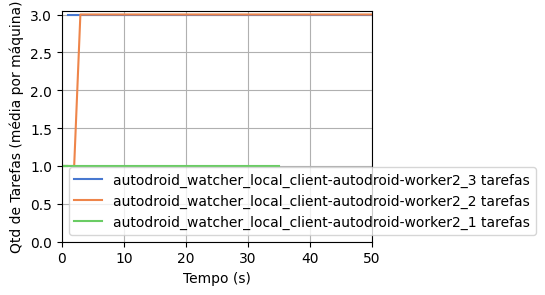

In [45]:
plot_statistics(data_depois, files5, field= "ActiveProcessingCount", label_sufix=" tarefas", save_path="tasks_un_g4_zoom.pdf", xlim=50,  field_std=None )

In [77]:
labels = {}
#dict_keys(['global.statistics_2', 'global.statistics_1', 'global.statistics_3', 'autodroid_watcher_local_client-autodroid-worker1_1', 'statistics_1', 'autodroid_watcher_local_client-autodroid-worker2_1', 'autodroid_watcher_local_client-autodroid-worker3_1', 'autodroid_watcher_local_client-autodroid-worker1_3', 'statistics_3', 'autodroid_watcher_local_client-autodroid-worker2_3', 'autodroid_watcher_local_client-autodroid-worker3_3', 'autodroid_watcher_local_client-autodroid-worker1_2', 'statistics_2', 'autodroid_watcher_local_client-autodroid-worker2_2', 'autodroid_watcher_local_client-autodroid-worker3_2'])
# labels["global.statistics_1"] = "G1"
# labels["global.statistics_2"] = "G2"
# labels["global.statistics_3"] = "G3"

labels["autodroid_watcher_local_client-autodroid-worker1_1"] = "G1"
labels["autodroid_watcher_local_client-autodroid-worker2_1"] = "G2"
labels["autodroid_watcher_local_client-autodroid-worker3_1"] = "G3"
 
files6 =  labels.keys()
print(files6)

dict_keys(['autodroid_watcher_local_client-autodroid-worker1_1', 'autodroid_watcher_local_client-autodroid-worker2_1', 'autodroid_watcher_local_client-autodroid-worker3_1'])


In [78]:
def plot_resources(data, file_list, field="ActiveProcessingCount_mean", ylabel="CPU Usage (%)", save_path="cpu.pdf", labels=None, xlim=1074):
    """
    Plots resource usage over time for multiple CSV datasets.

    Parameters:
    - data (dict): Dictionary containing dataframes with the CSV contents.
    - file_list (list): List of keys (file names) from the `data` dictionary to plot.
    - field (str): Column name to be plotted on the y-axis (default: "ActiveProcessingCount_mean").
    - ylabel (str): Label for the y-axis (default: "CPU Usage (%)").
    
    Returns:
    - None (displays the plot).
    """
   
    
    # Create the plot
    plt.figure(figsize=(4, 3))
    
    #print(file_list)  # Debugging: Print file list before plotting
    print(labels)
    for file, color in zip(file_list, colors):
        df = data[file]
        print("file:", file)
        if file is not None:
            if labels and file in labels:
                label = labels[file]  # mapping of file names to labels
            else:
                label = file
            plt.plot(df["Count"], df[field], label=label, color=color)
        
    plt.xlabel("Tempo (s)")
    plt.ylabel(ylabel)
    plt.ylim(0, 101)  # Limit y-axis to 0-101%
    if xlim is not None:
        plt.xlim(0, xlim)
    # plt.title("Comparison of ActiveProcessingCount Mean")  # Uncomment if title is needed
    plt.legend()
    plt.grid()
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    print(f"Plot saved as: {save_path}")
    plt.show()


{'autodroid_watcher_local_client-autodroid-worker1_1': 'G1', 'autodroid_watcher_local_client-autodroid-worker2_1': 'G2', 'autodroid_watcher_local_client-autodroid-worker3_1': 'G3'}
file: autodroid_watcher_local_client-autodroid-worker1_1
file: autodroid_watcher_local_client-autodroid-worker2_1
file: autodroid_watcher_local_client-autodroid-worker3_1
Plot saved as: cpu_un.pdf


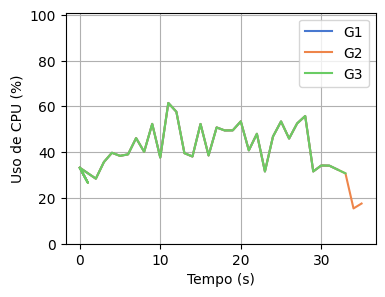

In [80]:
plot_resources(data_depois, files6, field="Host_CPU", ylabel="Uso de CPU (%)", labels=labels, save_path="cpu_un.pdf", xlim=None)

None
file: autodroid_watcher_local_client-autodroid-worker1_1
file: autodroid_watcher_local_client-autodroid-worker2_1
file: autodroid_watcher_local_client-autodroid-worker3_1
Plot saved as: mem_un.pdf


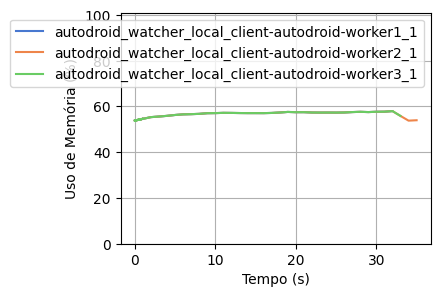

In [82]:
plot_resources(data_depois, files6, field="Host_Memory_UsedPercentage", ylabel="Uso de Memória (%)", save_path="mem_un.pdf", xlim=None)

None
file: autodroid_watcher_local_client-autodroid-worker1_1
file: autodroid_watcher_local_client-autodroid-worker1_2
file: autodroid_watcher_local_client-autodroid-worker1_3
Plot saved as: cpu_un_g4_zoom.pdf


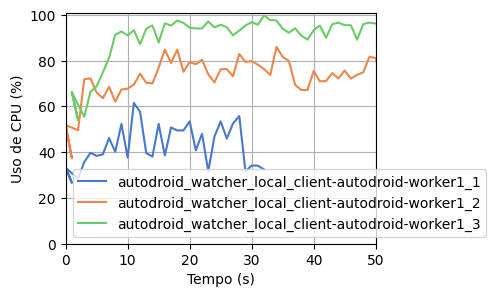

In [83]:
labels = {}
labels["autodroid_watcher_local_client-autodroid-worker1_1"] = "1 tarefa"
labels["autodroid_watcher_local_client-autodroid-worker1_2"] = "2 tarefas"  
labels["autodroid_watcher_local_client-autodroid-worker1_3"] = "3 tarefas"
files7 = labels.keys()
plot_resources(data_depois, files7, field="Host_CPU", ylabel="Uso de CPU (%)", save_path="cpu_un_g4_zoom.pdf",  xlim=50 )

None
file: autodroid_watcher_local_client-autodroid-worker1_1
file: autodroid_watcher_local_client-autodroid-worker1_2
file: autodroid_watcher_local_client-autodroid-worker1_3
Plot saved as: mem_un_g4_zoom.pdf


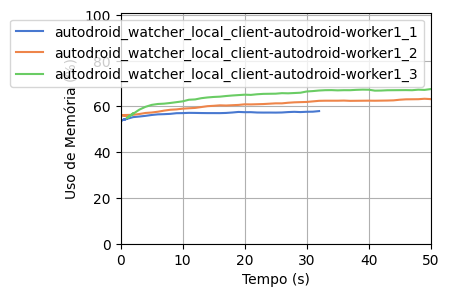

In [84]:
plot_resources(data_depois, files7, field="Host_Memory_UsedPercentage", ylabel="Uso de Memória (%)", save_path="mem_un_g4_zoom.pdf",  xlim=50 )